# Simulating logic gates using `crysx_nn`

In [1]:
import numpy as np
import matplotlib.pyplot as plt


# Import CrysX_nn related stuff

# Import loss functions
from crysx_nn.loss import MSE_loss, MSE_loss_grad
from crysx_nn.loss import BCE_loss, BCE_loss_grad
# Import neural network functions
from crysx_nn.network import nn_optimize_fast
from crysx_nn.network import visualize
from crysx_nn.network import forward_feed

C:\Users\manas\anaconda3\envs\crysx_nn\lib\site-packages\crysx_nn\network.py:12: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


## Define some network parameters that we will be using later on

In [64]:
nInputs = 2 # No. of nodes in the input layer
neurons_per_layer = [3, 1] # Neurons per layer (excluding the input layer)
activation_func_names = ['Tanh_offset', 'Tanh_offset']
nLayers = len(neurons_per_layer)
eeta = 0.5
nEpochs=10**4
batchSize = 4 # No. of input samples to process at a time for optimization

## Visualize the network

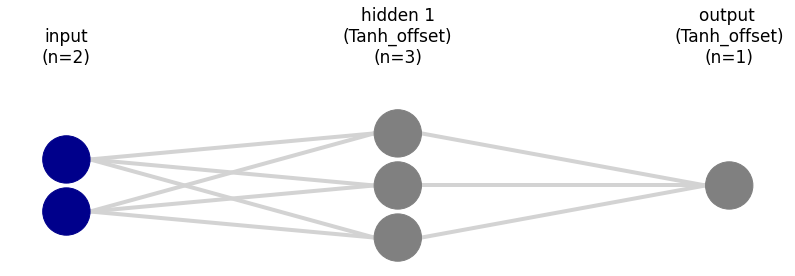

In [65]:
visualize(nInputs, neurons_per_layer, activation_func_names)

## Set the inputs (rows correspond to different set of inputs and columns represent the inputs)

In [66]:
inputs = np.array([[0.,0.,1.,1.],[0.,1.,0.,1.]]).T.astype('float32')
print(inputs)
print(inputs.dtype)

[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
float32


## Outputs for different logic gates

In [67]:
# AND function
outputAND = np.array([0.,0.,0.,1.])
outputAND = np.asarray([outputAND]).T
# OR function
outputOR = np.array([0.,1.,1.,1.])
outputOR = np.asarray([outputOR]).T
# NAND function
outputNAND = np.array([1.,1.,1.,0.])
outputNAND = np.asarray([outputNAND]).T
# XOR function
outputXOR = np.array([0.,1.,1.,0.])
outputXOR = np.asarray([outputXOR]).T

In [68]:
print('AND outputs\n', outputAND)
print('OR outputs\n', outputOR)
print('XOR outputs\n', outputXOR)
print('NAND outputs\n', outputNAND)

AND outputs
 [[0.]
 [0.]
 [0.]
 [1.]]
OR outputs
 [[0.]
 [1.]
 [1.]
 [1.]]
XOR outputs
 [[0.]
 [1.]
 [1.]
 [0.]]
NAND outputs
 [[1.]
 [1.]
 [1.]
 [0.]]


## Generate initial weights and biases

In [69]:
from crysx_nn.network import init_params
weightsOriginal, biasesOriginal = init_params(nInputs, neurons_per_layer, method='Xavier')
print('Weights matrices: \n', weightsOriginal)
print('Biases: \n', biasesOriginal)

Weights matrices: 
 [array([[-0.2170162 , -0.18752952],
       [ 0.22042384,  0.6977824 ],
       [-0.48915785, -0.40538035]]), array([[-0.24837589, -0.18457728, -0.19099267]])]
Biases: 
 [array([0., 0., 0.]), array([0.])]


## You can also define your own custom initial guess and weights

For example, for a neural network with 2 nodes in input layer, 3 nodes in hidden layer and 1 node in output layer use the following commented code

In [70]:
# # Initial guesses for weights
# w1 = 0.30
# w2 = 0.55
# w3 = 0.20
# w4 = 0.45
# w5 = 0.50
# w6 = 0.35
# w7 = 0.15
# w8 = 0.40
# w9 = 0.25

# # Initial guesses for biases
# b1 = 0.60
# b2 = 0.05

# # need to use a list instead of a numpy array, since the 
# #weight matrices at each layer are not of the same dimensions
# weights = [] 
# # Weights for layer 1 --> 2
# weights.append(np.array([[w1,w4],[w2, w5], [w3, w6]]))
# # Weights for layer 2 --> 3
# weights.append(np.array([[w7, w8, w9]]))
# # List of biases at each layer
# biases = []
# biases.append(np.array([b1,b1,b1]))
# biases.append(np.array([b2]))

# weightsOriginal = weights
# biasesOriginal = biases

# print('Weights matrices: ',weights)
# print('Biases: ',biases)

## Train neural network for AND gate
We will use the Mean Squared Error loss function (MSE_loss)

In [71]:

# Run optimization
optWeights, optBiases, errorPlot = nn_optimize_fast(inputs, outputAND, activation_func_names, nLayers, nEpochs=nEpochs, batchSize=batchSize, eeta=eeta, weights=weightsOriginal, biases=biasesOriginal, errorFunc=MSE_loss, gradErrorFunc=MSE_loss_grad,miniterEpoch=1,batchProgressBar=False,miniterBatch=100)



  0%|          | 0/10000 [00:00<?, ?it/s]

Average Error with initial weights and biases: 0.19453319343960523


### Visualize the training loss

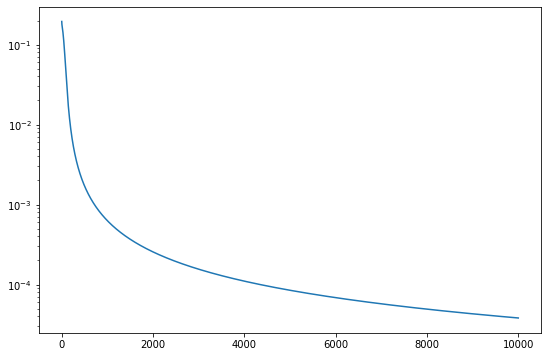

In [72]:
# Plot the error vs epochs
plt.plot(errorPlot)
plt.yscale('log')
plt.show()

### Optimized weights and biases

In [73]:
# Optimized weights and biases
print('Optimized Weights: ', optWeights)
print('Optimized Biases: ', optBiases)

Optimized Weights:  [array([[-1.47238471, -1.24011593],
       [ 0.84099957,  1.29333926],
       [-1.67077068, -1.45542318]]), array([[-2.85548003,  2.69807908, -3.36143935]])]
Optimized Biases:  [array([ 1.76886836, -1.24571708,  2.10868492]), array([0.79339517])]


### Make predictions using the optimized weights

In [74]:
# Forward feed with optimized weights
# Perform Forward feed and get the outputs at each layers and the inputs at each layer
a, z = forward_feed(inputs, nLayers, optWeights, optBiases, activation_func_names)
print('Outputs at each layer (including input layer):\n ',a)
print('Inputs at each layer :\n ', z)
# New Error
print('New Average Error with optimized weights:\n', MSE_loss(a[nLayers],outputAND)/batchSize)
print('Input: ',inputs)
print('Output: ',a[nLayers])
print('Expected Output: ',outputAND)

Outputs at each layer (including input layer):
  [array([[0., 0.],
       [0., 1.],
       [1., 0.],
       [1., 1.]], dtype=float32), array([[0.97174263, 0.07646086, 0.98547668],
       [0.74221343, 0.52379311, 0.78693083],
       [0.64404569, 0.3080109 , 0.70595703],
       [0.13155668, 0.85535616, 0.11557502]]), array([[3.80931387e-05],
       [5.96459907e-03],
       [5.62263229e-03],
       [9.90752539e-01]])]
Inputs at each layer :
  [array([[ 1.76886836, -1.24571708,  2.10868492],
       [ 0.52875243,  0.04762218,  0.65326174],
       [ 0.29648365, -0.4047175 ,  0.43791424],
       [-0.94363228,  0.88862175, -1.01750894]]), array([[-5.08771914],
       [-2.55796549],
       [-2.58765842],
       [ 2.33705786]])]
New Average Error with optimized weights:
 3.817685758948311e-05
Input:  [[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Output:  [[3.80931387e-05]
 [5.96459907e-03]
 [5.62263229e-03]
 [9.90752539e-01]]
Expected Output:  [[0.]
 [0.]
 [0.]
 [1.]]


## Train neural network for NAND gate
We will use the Mean Squared Error loss function (MSE_loss)

In [75]:

# Run optimization
optWeights, optBiases, errorPlot = nn_optimize_fast(inputs, outputNAND, activation_func_names, nLayers, nEpochs=nEpochs, batchSize=batchSize, eeta=eeta, weights=weightsOriginal, biases=biasesOriginal, errorFunc=MSE_loss, gradErrorFunc=MSE_loss_grad,miniterEpoch=1,batchProgressBar=False,miniterBatch=100)



  0%|          | 0/10000 [00:00<?, ?it/s]

Average Error with initial weights and biases: 0.34450083861453673


### Visualize the training loss

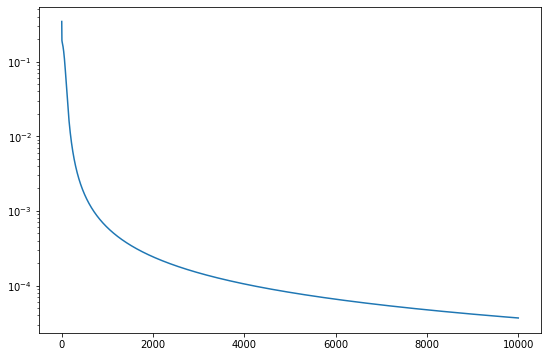

In [76]:
# Plot the error vs epochs
plt.plot(errorPlot)
plt.yscale('log')
plt.show()

### Optimized weights and biases

In [77]:
# Optimized weights and biases
print('Optimized Weights: ', optWeights)
print('Optimized Biases: ', optBiases)

Optimized Weights:  [array([[-1.0502594 , -0.8801167 ],
       [ 1.35929723,  1.55807145],
       [-1.52553915, -1.42921527]]), array([[ 1.97853933, -3.52614732,  3.22324288]])]
Optimized Biases:  [array([ 1.14143754, -1.9786267 ,  2.01168266]), array([-0.06201056])]


### Make predictions using the optimized weights

In [78]:
# Forward feed with optimized weights
# Perform Forward feed and get the outputs at each layers and the inputs at each layer
a, z = forward_feed(inputs, nLayers, optWeights, optBiases, activation_func_names)
print('Outputs at each layer (including input layer):\n ',a)
print('Inputs at each layer :\n ', z)
# New Error
print('New Average Error with optimized weights:\n', MSE_loss(a[nLayers],outputNAND)/batchSize)
print('Input: ',inputs)
print('Output: ',a[nLayers])
print('Expected Output: ',outputNAND)

Outputs at each layer (including input layer):
  [array([[0., 0.],
       [0., 1.],
       [1., 0.],
       [1., 1.]], dtype=float32), array([[0.90744879, 0.018757  , 0.98242187],
       [0.62776527, 0.30130095, 0.76222823],
       [0.54546315, 0.2246695 , 0.72557511],
       [0.17109634, 0.86732186, 0.13168481]]), array([[0.99993671],
       [0.99422787],
       [0.99410298],
       [0.00888308]])]
Inputs at each layer :
  [array([[ 1.14143754, -1.9786267 ,  2.01168266],
       [ 0.26132084, -0.42055525,  0.58246738],
       [ 0.09117814, -0.61932947,  0.48614351],
       [-0.78893856,  0.93874198, -0.94307177]]), array([[ 4.83385694],
       [ 2.57446289],
       [ 2.56369679],
       [-2.35734226]])]
New Average Error with optimized weights:
 3.6751340792601266e-05
Input:  [[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Output:  [[0.99993671]
 [0.99422787]
 [0.99410298]
 [0.00888308]]
Expected Output:  [[1.]
 [1.]
 [1.]
 [0.]]


## Train neural network for OR gate
We will use the Mean Squared Error loss function (MSE_loss)

In [79]:

# Run optimization
optWeights, optBiases, errorPlot = nn_optimize_fast(inputs, outputOR, activation_func_names, nLayers, nEpochs=nEpochs, batchSize=batchSize, eeta=eeta, weights=weightsOriginal, biases=biasesOriginal, errorFunc=MSE_loss, gradErrorFunc=MSE_loss_grad,miniterEpoch=1,batchProgressBar=False,miniterBatch=100)



  0%|          | 0/10000 [00:00<?, ?it/s]

Average Error with initial weights and biases: 0.33323441673360193


### Visualize the training loss

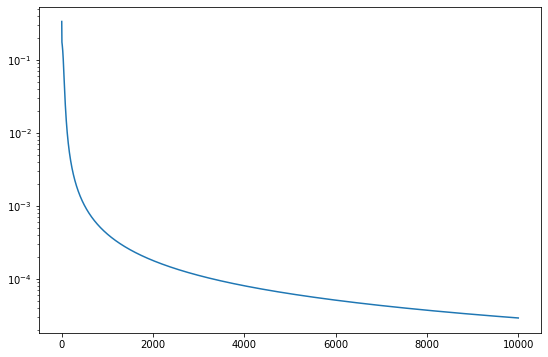

In [80]:
# Plot the error vs epochs
plt.plot(errorPlot)
plt.yscale('log')
plt.show()

### Optimized weights and biases

In [81]:
# Optimized weights and biases
print('Optimized Weights: ', optWeights)
print('Optimized Biases: ', optBiases)

Optimized Weights:  [array([[-1.2919744 , -1.2471441 ],
       [ 1.68563385,  1.77009197],
       [-1.74938818, -1.69758996]]), array([[-1.9402095 ,  2.97568165, -2.7859191 ]])]
Optimized Biases:  [array([ 0.46205132, -0.7309624 ,  0.72942029]), array([0.63398077])]


### Make predictions using the optimized weights

In [82]:
# Forward feed with optimized weights
# Perform Forward feed and get the outputs at each layers and the inputs at each layer
a, z = forward_feed(inputs, nLayers, optWeights, optBiases, activation_func_names)
print('Outputs at each layer (including input layer):\n ',a)
print('Inputs at each layer :\n ', z)
# New Error
print('New Average Error with optimized weights:\n', MSE_loss(a[nLayers],outputOR)/batchSize)
print('Input: ',inputs)
print('Output: ',a[nLayers])
print('Expected Output: ',outputOR)

Outputs at each layer (including input layer):
  [array([[0., 0.],
       [0., 1.],
       [1., 0.],
       [1., 1.]], dtype=float32), array([[0.71587731, 0.18817311, 0.81135528],
       [0.17218994, 0.88877205, 0.12605057],
       [0.15978265, 0.87094531, 0.11507327],
       [0.01545671, 0.99572006, 0.0043418 ]]), array([[0.00731275],
       [0.99444156],
       [0.99445931],
       [0.99918351]])]
Inputs at each layer :
  [array([[ 0.46205132, -0.7309624 ,  0.72942029],
       [-0.78509278,  1.03912956, -0.96816966],
       [-0.82992308,  0.95467145, -1.01996788],
       [-2.07706718,  2.72476342, -2.71755784]]), array([[-2.4553981 ],
       [ 2.59343221],
       [ 2.5950401 ],
       [ 3.55484151]])]
New Average Error with optimized weights:
 2.8934607855121334e-05
Input:  [[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Output:  [[0.00731275]
 [0.99444156]
 [0.99445931]
 [0.99918351]]
Expected Output:  [[0.]
 [1.]
 [1.]
 [1.]]


## Train neural network for XOR gate
We will use the Mean Squared Error loss function (MSE_loss)

In [83]:

# Run optimization
optWeights, optBiases, errorPlot = nn_optimize_fast(inputs, outputXOR, activation_func_names, nLayers, nEpochs=nEpochs, batchSize=batchSize, eeta=eeta, weights=weightsOriginal, biases=biasesOriginal, errorFunc=MSE_loss, gradErrorFunc=MSE_loss_grad,miniterEpoch=1,batchProgressBar=False,miniterBatch=100)



  0%|          | 0/10000 [00:00<?, ?it/s]

Average Error with initial weights and biases: 0.26894312080503385


### Visualize the training loss

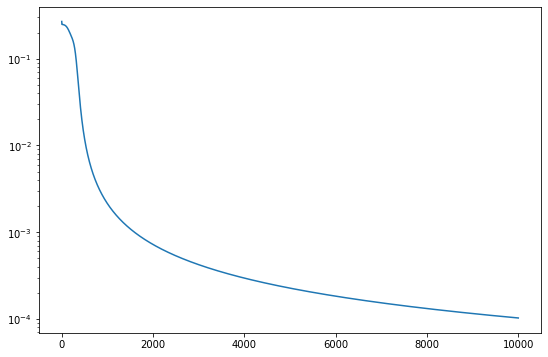

In [84]:
# Plot the error vs epochs
plt.plot(errorPlot)
plt.yscale('log')
plt.show()

### Optimized weights and biases

In [85]:
# Optimized weights and biases
print('Optimized Weights: ', optWeights)
print('Optimized Biases: ', optBiases)

Optimized Weights:  [array([[-1.52806566, -1.51593417],
       [ 1.92531914,  1.93820211],
       [-3.33015437, -3.33532684]]), array([[ 2.88631368, -3.91846703, -5.75891616]])]
Optimized Biases:  [array([ 2.43701242, -3.03413282,  1.42724762]), array([0.31754992])]


### Make predictions using the optimized weights

In [86]:
# Forward feed with optimized weights
# Perform Forward feed and get the outputs at each layers and the inputs at each layer
a, z = forward_feed(inputs, nLayers, optWeights, optBiases, activation_func_names)
print('Outputs at each layer (including input layer):\n ',a)
print('Inputs at each layer :\n ', z)
# New Error
print('New Average Error with optimized weights:\n', MSE_loss(a[nLayers],outputXOR)/batchSize)
print('Input: ',inputs)
print('Output: ',a[nLayers])
print('Expected Output: ',outputXOR)

Outputs at each layer (including input layer):
  [array([[0., 0.],
       [0., 1.],
       [1., 0.],
       [1., 1.]], dtype=float32), array([[9.92415422e-01, 2.30983742e-03, 9.45550582e-01],
       [8.63203553e-01, 1.00483722e-01, 2.15380988e-02],
       [8.60313174e-01, 9.81786772e-02, 2.17571926e-02],
       [2.28998508e-01, 8.40073744e-01, 2.81913496e-05]]), array([[0.01051012],
       [0.98987425],
       [0.98986277],
       [0.00969018]])]
Inputs at each layer :
  [array([[ 2.43701242, -3.03413282,  1.42724762],
       [ 0.92107825, -1.0959307 , -1.90807922],
       [ 0.90894676, -1.10881368, -1.90290676],
       [-0.60698741,  0.82938843, -5.23823359]]), array([[-2.27242542],
       [ 2.29124789],
       [ 2.29067585],
       [-2.31345217]])]
New Average Error with optimized weights:
 0.00010241415749641483
Input:  [[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Output:  [[0.01051012]
 [0.98987425]
 [0.98986277]
 [0.00969018]]
Expected Output:  [[0.]
 [1.]
 [1.]
 [0.]]
